<a href="https://colab.research.google.com/github/StephMcCallum/MSE563-SM/blob/main/Project1_resub_mc_lj_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt

def pbc(d,L):
  for i,x in enumerate(d):
    if x > L/2:
      d[i] = x-L
    elif x <= -L/2:
      d[i] = x+L
  return d

def distance(ri,rj,L):
  d = pbc(rj-ri,L)
  return numpy.linalg.norm(d)

def lj(r,epsilon=1.,sigma=1.):
  return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

class simulation():
  def __init__(self,N=100,L=10,T=1.,maxD=0.1,maxSteps=10,debug=False,seed=2):
    numpy.random.seed(seed)
    self.N = N
    self.L = L
    self.T = T
    self.maxD = maxD
    self.accept = 0
    self.reject = 0
    self.rcut = 2.5
    self.pos = numpy.zeros((N,3))
    self.debug = debug
    self.maxSteps = maxSteps
    self.energies = numpy.zeros(maxSteps)
    for i in range(self.N):
      while True:
        self.pos[i] = numpy.random.uniform(low=-L/2,high=L/2,size=3)
        if self.energy(i,initializing=True)<=0.:
          break
    self.E = self.energy()
    for i in range(self.maxSteps):
      self.trial()
      if self.debug:
        print("{:03}:   {:.2f}".format(i, self.E))
      self.energies[i] = self.E

  def energy(self,i=None,initializing=False):
    E = 0
    if i is not None and initializing:
      pi = self.pos[i]
      for j in range(i):
        r = distance(pi,self.pos[j],self.L)
        if r <= self.rcut:
          E += lj(r)
      return E
    if i is None:
      for i in range(self.N-1):
        pi = self.pos[i]
        for j in range(i+1,self.N):
          r = distance(pi,self.pos[j],self.L) # speed up with numpy
          if r <= self.rcut:
            E += lj(r)
      return E

  def trial(self):
    i = numpy.random.randint(self.N)
    oldP = numpy.copy(self.pos[i])
    oldE = self.E
    oldEi = self.energy()
    d = numpy.random.uniform(low=-self.maxD,high=self.maxD,size=3)
    newP = pbc(oldP+d,self.L)
    self.pos[i] = newP
    newEi = self.energy()
    dE = newEi - oldEi
    if numpy.random.uniform() <= numpy.exp(-dE/self.T):
      if self.debug:
        print("accept")
      self.accept += 1
      self.E += dE
      return
    else:
      if self.debug:
        print("reject")
      self.pos[i] = oldP
      self.reject += 1
      self.E = oldE
      return

In [ ]:
def autocorr1D(array):
    """Takes in a linear np array, performs autocorrelation
    function and returns normalized array with half the length
    of the input.

    Parameters
    ----------
    data : numpy.typing.Arraylike, required
        1-D series of data to perform autocorrelation on.

    Returns
    -------
    1D np.array

    """
    ft = numpy.fft.rfft(array - numpy.average(array))
    acorr = numpy.fft.irfft(ft * numpy.conjugate(ft)) / (len(array) * numpy.var(array))
    return acorr[0 : len(acorr) // 2]  # noqa: E203

# State Point 1
## T=0.5
## N/V = 0.5

In [ ]:
import time
density = 0.5
N = 32
V = N/density
L = V**(1/3)
print(L)
maxSteps = 600000
t1 = time.perf_counter()
s = simulation(N=N,L=L,T=0.5,maxSteps=maxSteps, seed = 2)
t2 = time.perf_counter()
s_d_time = t2-t1

3.9999999999999996


In [ ]:
print("\nN=",N,"steps/sec =", maxSteps/s_d_time)
print("acceptance rate:",s.accept/maxSteps)


N= 32 steps/sec = 337.77281298955035
acceptance rate: 0.54115


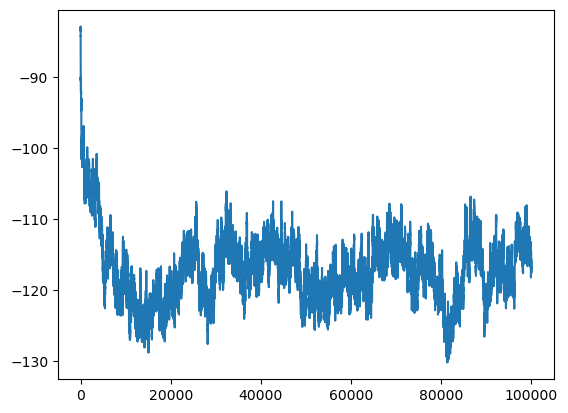

In [ ]:
plt.plot(s.energies[:100000])

[27394 27395 27396 27397 27398 27399 27400 27401 27402 27403]


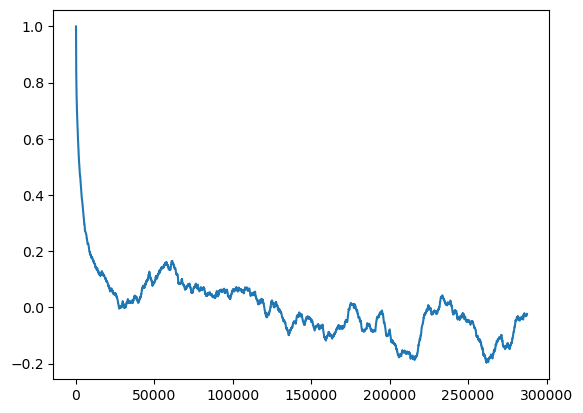

In [ ]:
a = autocorr1D(s.energies[25000:])
plt.plot(a)
print(numpy.where(a <= 0)[0][:10])
decorrelation_time = numpy.where(a <= 0)[0][0]

In [ ]:
independent_samples = (600000-25000)/decorrelation_time
print("Decorrelation time", decorrelation_time, " Number of independent samples:",independent_samples)

Decorrelation time 27394  Number of independent samples: 20.98999780973936


In [ ]:
density = 0.5
N = 32
V = N/density
L = V**(1/3)
print(L)
maxSteps = 600000
print("N= ",N,"<E>/N= ",s.energies[maxSteps//2:].mean()/N,"+/- ",s.energies[maxSteps//2:].std()/N)

3.9999999999999996
N=  32 <E>/N=  -3.7468227218433223 +/-  0.13804490163986083


# State Point 2
## N/V= 0.5 T=2.0

In [ ]:
density = 0.5
N = 32
V = N/density
L = V**(1/3)
print(L)
maxSteps = 100000
t1 = time.perf_counter()
s1 = simulation(N=N,L=L,T=2.0,maxSteps=maxSteps, seed = 2)
t2 = time.perf_counter()
s1_d_time = t2-t1

3.9999999999999996


In [ ]:
print("\nN=",32,"steps/sec =", maxSteps/s1_d_time)
print("acceptance rate:",s1.accept/maxSteps)


N= 32 steps/sec = 336.5969730964554
acceptance rate: 0.75593


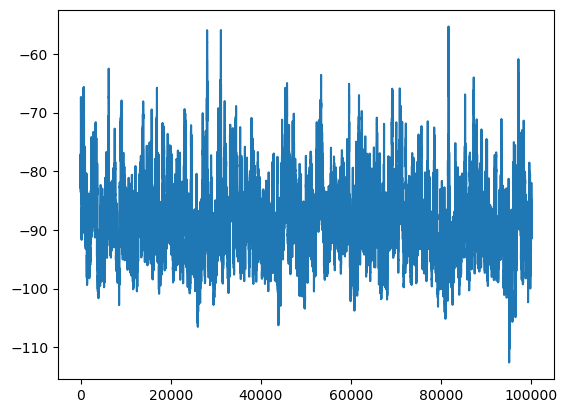

In [ ]:
plt.plot(s1.energies)

[  844   845   846 ... 49497 49498 49499]


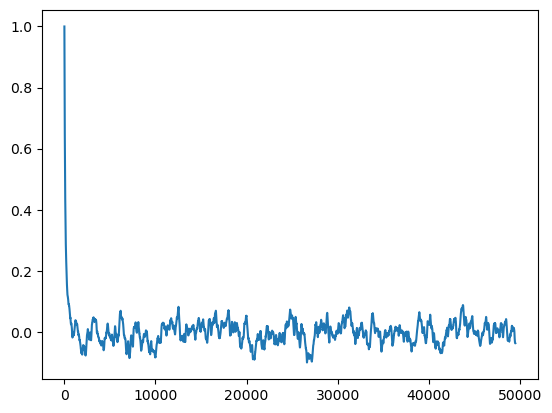

In [ ]:
a = autocorr1D(s1.energies[1000:])
plt.plot(a)
print(numpy.where(a <= 0)[0])

In [ ]:
decorrelation_time = numpy.where(a <= 0)[0][0]
independent_samples = (100000-1000)/decorrelation_time
print("Decorrelation time", decorrelation_time, " Number of independent samples:",independent_samples)

Decorrelation time 844  Number of independent samples: 117.29857819905213


In [ ]:
density = 0.7
N = 32
V = N/density
L = V**(1/3)
print(L)
maxSteps = 100000
print("N= ",N,"<E>/N= ",s1.energies[maxSteps//2:].mean()/N,"+/- ",s1.energies[maxSteps//2:].std()/N)

3.5756141403862705
N=  32 <E>/N=  -2.7733493933779187 +/-  0.19403978727031956


# State Point 3
## N/V = 0.7 T=0.5

In [ ]:
density = 0.7
N = 45
V = N/density
L = V**(1/3)
print(L)
maxSteps = 100000
t1 = time.perf_counter()
s2 = simulation(N=N,L=L,T=0.5,maxSteps=maxSteps, seed = 2)
t2 = time.perf_counter()
s2_d_time = t2-t1

4.005943545145987


In [ ]:
print("\nN=",45,"steps/sec =", maxSteps/s2_d_time)
print("acceptance rate:",s2.accept/maxSteps)


N= 45 steps/sec = 170.4088433035463
acceptance rate: 0.49646


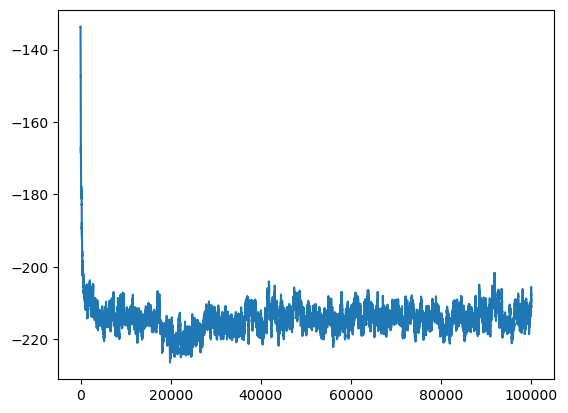

In [ ]:
plt.plot(s2.energies[:])

[ 1077  1078  1079 ... 29997 29998 29999]


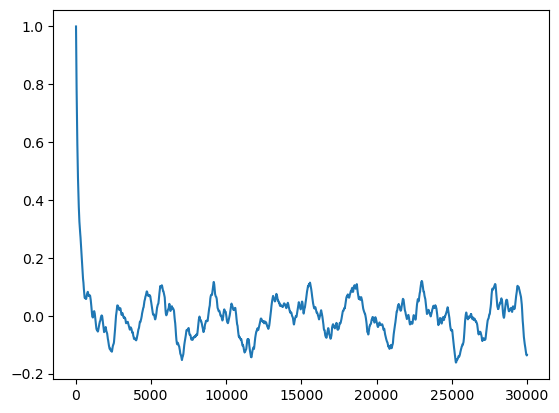

In [ ]:
a = autocorr1D(s2.energies[40000:])
plt.plot(a)
print(numpy.where(a <= 0)[0])

In [ ]:
decorrelation_time = numpy.where(a <= 0)[0][0]
independent_samples = (100000-40000)/decorrelation_time
print("Decorrelation time", decorrelation_time, " Number of independent samples:",independent_samples)

Decorrelation time 1077  Number of independent samples: 55.710306406685234


In [ ]:
density = 0.7
N = 45
V = N/density
L = V**(1/3)
print(L)
maxSteps = 100000
print("N= ",N,"<E>/N= ",s2.energies[maxSteps//2:].mean()/N,"+/- ",s2.energies[maxSteps//2:].std()/N)

4.005943545145987
N=  45 <E>/N=  -4.756626256710314 +/-  0.05885955503923805


# State Point 4
## N/V = 0.7 T=2.0

In [ ]:
density = 0.7
N = 45
V = N/density
L = V**(1/3)
print(L)
maxSteps = 100000

t1 = time.perf_counter()
s3 = simulation(N=N,L=L,T=2.0,maxSteps=maxSteps, seed = 2)
t2 = time.perf_counter()
s3_d_time = t2-t1

4.005943545145987


In [ ]:
print("\nN=",45,"steps/sec =", maxSteps/s3_d_time)
print("acceptance rate:",s3.accept/maxSteps)


N= 45 steps/sec = 170.18093714972775
acceptance rate: 0.64242


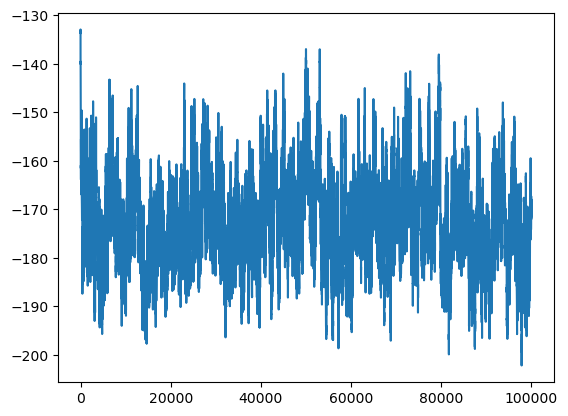

In [ ]:
plt.plot(s3.energies)

[ 2646  2647  2648 ... 49497 49498 49499]


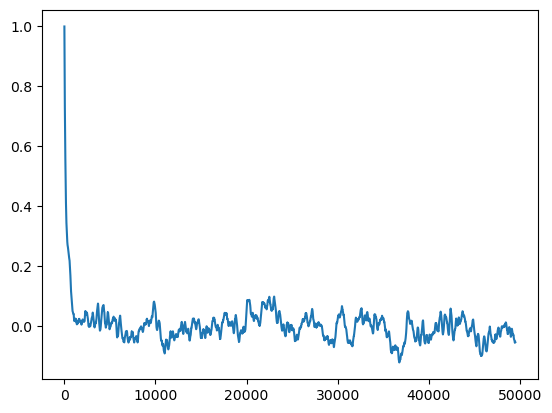

In [ ]:
a = autocorr1D(s3.energies[1000:])
plt.plot(a)
print(numpy.where(a <= 0)[0])

In [ ]:
decorrelation_time = numpy.where(a <= 0)[0][0]
independent_samples = (100000-1000)/decorrelation_time
print("Decorrelation time", decorrelation_time, " Number of independent samples:",independent_samples)

Decorrelation time 2646  Number of independent samples: 37.414965986394556


In [ ]:
density = 0.7
N = 45
V = N/density
L = V**(1/3)
print(L)
maxSteps = 100000
print("N= ",N,"<E>/N= ",s3.energies[maxSteps//2:].mean()/N,"+/- ",s3.energies[maxSteps//2:].std()/N)

4.005943545145987
N=  45 <E>/N=  -3.845187021214364 +/-  0.2186184439740195


# Project 1 Resubmission Summary

Last week, I submitted my own 3D model for this project based off of the given 2D lattice model. I discovered this week through your example 3D code and from other students more efficient ways to model this 3D LJ system. Such as removing the particle class, and utilizing numpy array functions. I attempted to implement these in my own code for a few hours, but was still getting extremely high energy for the initial configurations. The rest of the answers for the assignment are given using the 3D code provided on Monday.

I discovered that the cold systems take a long time to equillibrate, and need to be ran longer to achieve the desired independent samples. I started running my code on my local computer and in Google Chrome instead of Safari, which dramatically reduced computation time. Overall, I feel more confident this week in being able to characterize the performance of a Monte Carlo simulation and to use autocorrelation functions.

Comparing the different state points, I was most surprised by State Point 3, N/V = 0.7, T=0.5. This simulation did not take as long to equillibrate as the first state point at the same temperature. I was expecting a colder, denser system would take longer to equillibrate.
